In [1]:
#Importing required packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.optimize import curve_fit

In [2]:
#Loading in the data.
vertexData = coords=np.loadtxt('dataGit/musae_git_target.csv', dtype=int, delimiter=',', skiprows=1, usecols=0)
edgeData = coords=np.loadtxt('dataGit/musae_git_edges.csv', dtype=int, delimiter=',', skiprows=1)

#Note that the network is undirected, but if we have edge (a,b) we do not have edge (b,a) in the data.

In [3]:
#Finding the number of edges for each vertex

degrees = [] #Make a list for the number of edges for each vertex
edgeData1 = edgeData[:,0] #First column of the edge data
edgeData2 = edgeData[:,1] #Second column of the edge data

for i in vertexData:
    if i%5000 == 0: print(str(i/len(vertexData)*100)+'%') #Status for loading time
    nEdges = len(edgeData1[edgeData1==i]) + len(edgeData2[edgeData2==i])
    degrees.append(nEdges)

0.0%
13.262599469496022%
26.525198938992045%
39.787798408488065%
53.05039787798409%
66.3129973474801%
79.57559681697613%
92.83819628647215%


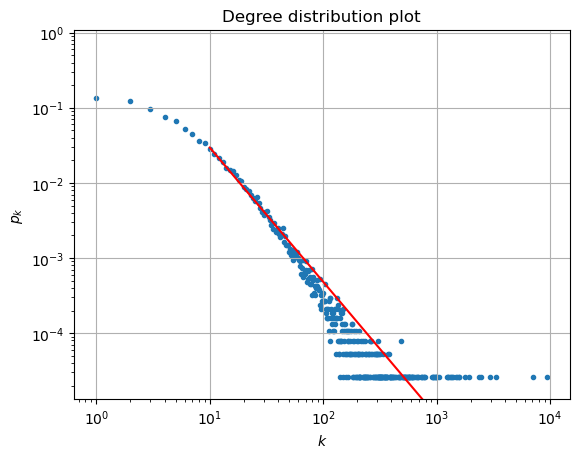

In [8]:
#Converting the number of degrees to frequency
unique, counts = np.unique(degrees, return_counts=True)
fraction = counts/len(vertexData)

#Fitting a power law
def powerLaw(k, c, gamma):
    return c*k**(-gamma)

#We want to fit the power law only to the tail
tail = 10
uniqueTail = unique[unique >= tail]
fractionTail = fraction[unique >= tail]
popt, pcov = curve_fit(powerLaw, uniqueTail, fractionTail)

#Plotting the degree distribution and the fit
plt.title('Degree distribution plot')
plt.scatter(unique, fraction, marker='.')
plt.plot(uniqueTail, powerLaw(uniqueTail, *popt), c='r')
plt.xscale('log')
plt.xlabel('$k$')
plt.yscale('log')
plt.ylabel('$p_k$')
plt.ylim(np.min(fraction)/2, 1.1)
plt.grid()

In [9]:
#Creating the adjacency matrix
A = np.zeros((len(vertexData), len(vertexData)))
A[edgeData[:,0], edgeData[:,1]] = 1
A[edgeData[:,1], edgeData[:,0]] = 1

#Taking power of matrix, this takes some time to run.
A2 = sparse.csr_matrix(A).multiply(sparse.csr_matrix(A)).toarray() #Solution from here https://stackoverflow.com/questions/42537943/scipy-sparse-matrix-multiplication
A3 = sparse.csr_matrix(A).multiply(sparse.csr_matrix(A2)).toarray()

In [9]:
#Now compute the clustering coefficient
#Ci = 2*(#triangles with vertex in i)/(ki(ki-1))
#Where (#triangles with vertex in i) = A^3[i,i]/2
#So Ci = A^3[i,i]/(ki(ki-1))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
